<a href="https://colab.research.google.com/github/Yhawech/Exam--Practice/blob/master/House_Price_Prediction(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     area_sqft  bedrooms  age_years  loc_rating  price_lakhs
0  1061.810178         2         18           4    78.826121
1  1926.071460         3          5           3   162.275900
2  1597.990913         1          5           4   127.242176
3  1397.987726         1          2           5   105.002950
4   734.027961         1          6           3    49.695924
RMSE (lakhs): 7.02, R²: 0.96


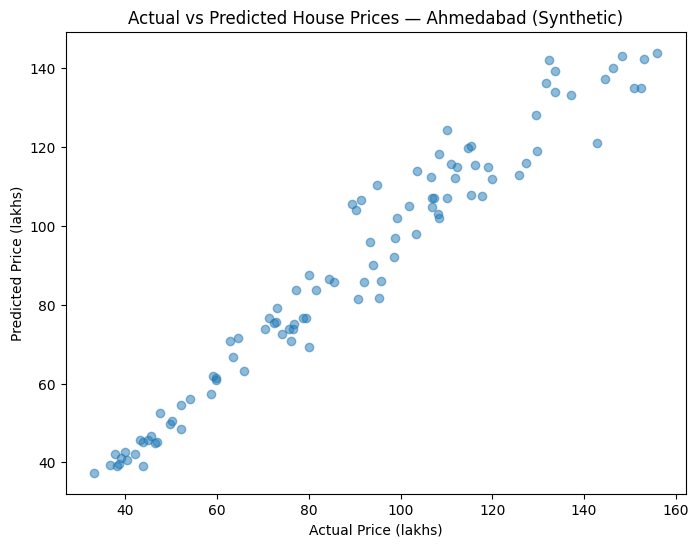

Predicted Price for sample: ₹87.20 lakhs (~₹8720293)


In [1]:
# Step 1: Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 2: Generate Synthetic Data (Ahmedabad-specific ranges)
np.random.seed(42)
n = 500

# Features
area = np.random.uniform(500, 2000, n)  # sq ft
bedrooms = np.random.randint(1, 5, n)
age = np.random.randint(0, 20, n)  # years old
location_rating = np.random.randint(1, 6, n)  # 1 (low) to 5 (premium)

# Price per sq ft trends: ~₹7,176–7,640
price_per_sqft = np.random.normal(7300, 500, n)

# Generate target: total price in lakhs
price = (area * price_per_sqft) / 1e5

# Create DataFrame
df = pd.DataFrame({
    'area_sqft': area,
    'bedrooms': bedrooms,
    'age_years': age,
    'loc_rating': location_rating,
    'price_lakhs': price
})

# Optional: Explore the dataset
print(df.head())

# Step 3: Train-Test Split
X = df[['area_sqft', 'bedrooms', 'age_years', 'loc_rating']]
y = df['price_lakhs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Regression Model
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 5: Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE (lakhs): {rmse:.2f}, R²: {r2:.2f}")

# Step 6: Actual vs Predicted Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price (lakhs)")
plt.ylabel("Predicted Price (lakhs)")
plt.title("Actual vs Predicted House Prices — Ahmedabad (Synthetic)")
plt.show()

# Step 7: Predict Single Example
example = pd.DataFrame({
    'area_sqft': [1200],
    'bedrooms': [3],
    'age_years': [5],
    'loc_rating': [4]
})
pred = model.predict(example)[0]
print(f"Predicted Price for sample: ₹{pred*1e5/1e5:.2f} lakhs (~₹{pred*1e5:.0f})")
